## Lab Assignment 2

* Aimi Afifah Binti Muhammad Husni (SW01083127)
* Sarah Hani Binti Mohd Azral (SW01083158)

## Python Codes

# 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import re

In [2]:
# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aimi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load the dataset
df = pd.read_csv('Reviews.csv')

In [4]:
# Drop duplicates and missing values
df.drop_duplicates(subset=['Text'], inplace=True)
df.dropna(inplace=True)

In [5]:
# Text preprocessing function
def preprocess_text(text):
    # Remove special characters and numbers using regex
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenization and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

In [6]:
# Apply preprocessing to the 'Text' column
df['CleanedText'] = df['Text'].apply(preprocess_text)

In [7]:
# Extract the clean data
df.to_csv('LabAssignment2_SW01083158_SW01083127.csv', index=False)

# 2. Feature Extraction to convert text data

In [8]:
# Feature Extraction (TF-IDF)
X_train, X_test, y_train, y_test = train_test_split(df['CleanedText'], df['Score'], test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 3a. Machine Learning Based Approach


Naive Bayes Classifier Metrics:
Accuracy: 0.6448572009350544
Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.08      0.14      7163
           2       0.00      0.00      0.00      4217
           3       0.00      0.00      0.00      5950
           4       0.39      0.00      0.00     11172
           5       0.64      1.00      0.78     50210

    accuracy                           0.64     78712
   macro avg       0.38      0.22      0.19     78712
weighted avg       0.54      0.64      0.51     78712



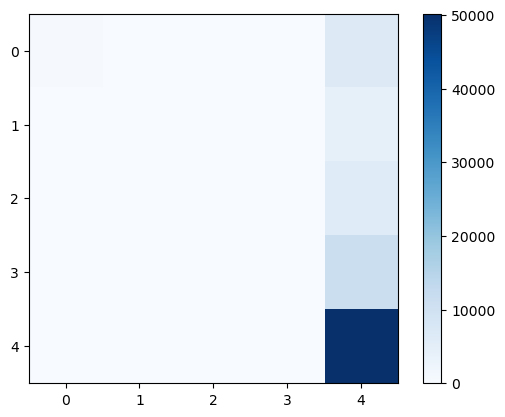

In [9]:
# Naive Bayes Classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)
nb_preds = nb_clf.predict(X_test_tfidf)

print("\nNaive Bayes Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Classification Report:\n", classification_report(y_test, nb_preds))
conf_mat_nb = confusion_matrix(y_test, nb_preds)
plt.imshow(conf_mat_nb, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()


Logistic Regression Classifier Metrics:
Accuracy: 0.7186451875190568
Classification Report:
               precision    recall  f1-score   support

           1       0.62      0.64      0.63      7163
           2       0.35      0.12      0.18      4217
           3       0.39      0.23      0.29      5950
           4       0.46      0.21      0.29     11172
           5       0.78      0.95      0.86     50210

    accuracy                           0.72     78712
   macro avg       0.52      0.43      0.45     78712
weighted avg       0.67      0.72      0.68     78712



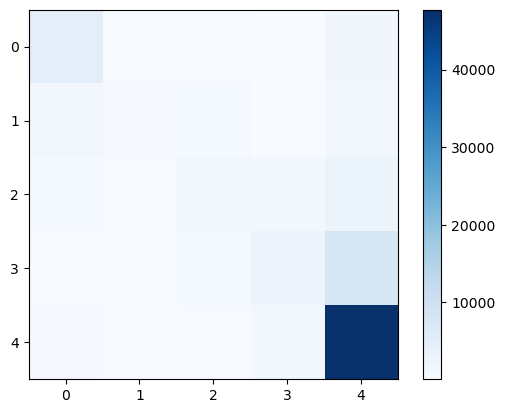

In [10]:
# Logistic Regression Classifier
lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train_tfidf, y_train)
lr_preds = lr_clf.predict(X_test_tfidf)

print("\nLogistic Regression Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))
conf_mat_lr = confusion_matrix(y_test, lr_preds)
plt.imshow(conf_mat_lr, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

# 3b. Lexicon Based Approach


VADER Sentiment Analysis Metrics:
Accuracy: 0.0588474438459193
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      1.00      0.00         0
           0       0.00      1.00      0.00         0
           1       0.07      0.65      0.12      7163
           2       1.00      0.00      0.00      4217
           3       1.00      0.00      0.00      5950
           4       1.00      0.00      0.00     11172
           5       1.00      0.00      0.00     50210

    accuracy                           0.06     78712
   macro avg       0.58      0.38      0.02     78712
weighted avg       0.91      0.06      0.01     78712



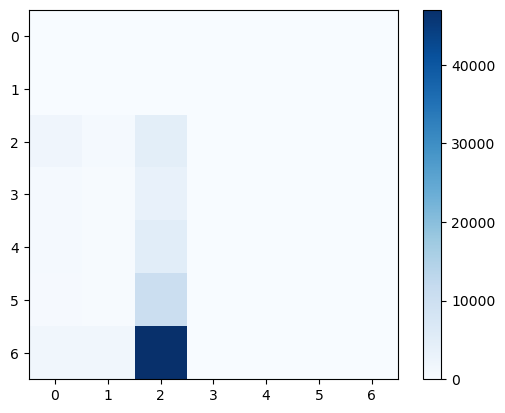


TextBlob Sentiment Analysis Metrics:
Accuracy: 0.053918081105803435
Classification Report:
               precision    recall  f1-score   support

          -1       0.00      1.00      0.00         0
           0       0.00      1.00      0.00         0
           1       0.06      0.59      0.11      7163
           2       1.00      0.00      0.00      4217
           3       1.00      0.00      0.00      5950
           4       1.00      0.00      0.00     11172
           5       1.00      0.00      0.00     50210

    accuracy                           0.05     78712
   macro avg       0.58      0.37      0.02     78712
weighted avg       0.91      0.05      0.01     78712



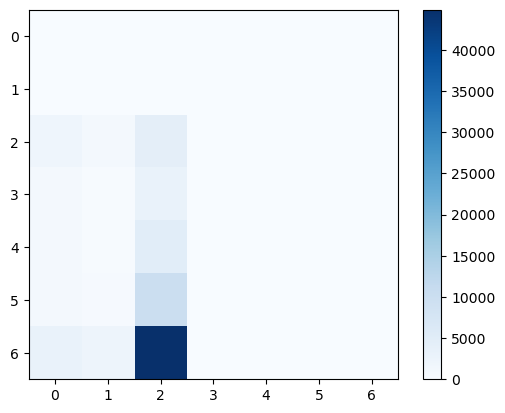

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Define a function for sentiment analysis using VADER
def vader_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 1  # Positive sentiment
    elif sentiment_score <= -0.05:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

# Apply VADER sentiment analysis to test data
vader_preds = [vader_sentiment(text) for text in X_test]

print("\nVADER Sentiment Analysis Metrics:")
print("Accuracy:", accuracy_score(y_test, vader_preds))
print("Classification Report:\n", classification_report(y_test, vader_preds, zero_division=1))
conf_mat_vader = confusion_matrix(y_test, vader_preds)
plt.imshow(conf_mat_vader, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

# Define a function for sentiment analysis using TextBlob
def textblob_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 1  # Positive sentiment
    elif analysis.sentiment.polarity < 0:
        return -1  # Negative sentiment
    else:
        return 0  # Neutral sentiment

# Apply TextBlob sentiment analysis to test data
textblob_preds = [textblob_sentiment(text) for text in X_test]

print("\nTextBlob Sentiment Analysis Metrics:")
print("Accuracy:", accuracy_score(y_test, textblob_preds))
print("Classification Report:\n", classification_report(y_test, textblob_preds, zero_division=1))
conf_mat_textblob = confusion_matrix(y_test, textblob_preds)
plt.imshow(conf_mat_textblob, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()


# 4. Model Evaluation

1. Machine Learning-Based Approach:

* Naive Bayes Classifier: Achieves an accuracy of 0.645 with relatively low precision, recall, and F1-scores for most classes, indicating challenges in correctly predicting various sentiments.
* Logistic Regression Classifier: Shows improvement with an accuracy of 0.719 and better precision, recall, and F1-scores across classes compared to Naive Bayes.

2. Lexicon-Based Approach:

* VADER Sentiment Analysis: Performs poorly with an accuracy of 0.059, mainly due to issues with handling neutral sentiments and limited vocabulary coverage for nuanced sentiments.
* TextBlob Sentiment Analysis: Similar to VADER, it also struggles with an accuracy of 0.054, indicating challenges in accurately capturing sentiment nuances.nces.

# 5. Discussion on Strengths and Weaknesses

Machine learning models like Naive Bayes and Logistic Regression excel in sentiment analysis due to their ability to learn from data, capturing complex patterns in language that reflect sentiment. They are adept at handling nuanced sentiments, which is crucial in tasks where emotions can vary widely. However, these models heavily rely on labeled data for training and may struggle with rare or ambiguous sentiments. On the other hand, lexicon-based methods such as VADER and TextBlob are easy to implement and computationally efficient, making them suitable for basic sentiment analysis tasks. However, their performance is limited by vocabulary coverage and the inability to grasp context-dependent sentiments or sarcasm, which are common in natural language expressions. Choosing the appropriate model depends on the task complexity and the need for nuanced sentiment understanding versus simplicity and speed of analysis.sources.sources.